# Lab 2: Multiple Hypothesis Testing
Welcome to the second DS102 lab! 

The goals of this lab are to get familiar with multiple hypothesis testing scenarios, as well as to investigate several procedures for controlling the number of false discoveries.

The code you need to write is commented out with a message "TODO: fill in". There is additional documentation for each part as you go along.


## Course Policies

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** in the cell below.

**Submission**: to submit this assignment, rerun the notebook from scratch (by selecting Kernel > Restart & Run all), and then print as a pdf (File > download as > pdf) and submit it to Gradescope.


**This assignment should be completed and submitted before Thursday February 06, 2020 at 11:59 PM.**

# Collaborators
Write the names of your collaborators in this cell.

# Setup
Let's begin by importing the libraries we will use. You can find the documentation for the libraries here:
* matplotlib: https://matplotlib.org/3.1.1/contents.html
* numpy: https://docs.scipy.org/doc/
* pandas: https://pandas.pydata.org/pandas-docs/stable/
* seaborn: https://seaborn.pydata.org/

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
%matplotlib inline

# 1) Distribution of p-values under the null and alternative hypotheses

The first part of this assignment looks at the distribution of p-values when draws are from the null hypothesis and when draws are from the alternative hypothesis.

We will consider draws from the null distribution:
$$ D_0: \mathcal{N}(0,1)$$
as well as from the alternative distribution:
$$ D_1: \mathcal{N}(2,1)$$

First, we will draw 1000 instances from the null distribution, and investigate the distribution of p-values that results from a $z$-test on these scores. Then, in part b, we will repeat the same procedure, but for data drawn from the alternative distribution. In part c we will summarize our findings.

We will use p-values from a one-sided test, such that the p-value of an observed value $x_i$ is the probability that a random value $x'$ drawn from $D_0$ has a value greater than or equal to $x_i$:
$$ P_{x' \sim D_0}(x' \geq x_i)$$

The following function will calculate the p-values for you when you provide the mean and standard deviation of the null distribution. All you need to do is run the cell to instantiate it.

In [4]:
# This function is written written for you, we'll use one-sided hypothesis tests
def calculate_p_values(x, mean_0, stdev_0):
    """
    Computes the one-sided p-value for the null and alternative distributions defined in the cell above.
    
    Inputs:
    mean_0: mean of the null (Gaussian) distribution
    stdev_0: standard deviation of the null (Gaussian) distribution
    """
    # for a one sided test, with h_1: mu > mean_0
    z_scores = (x - mean_0)/stdev_0
    return 1 - scipy.stats.norm.cdf(z_scores)


## 1a) Plot the distribution of p-values for 1000 random draws that actually come from the null distribution: 
 $$ x_i \sim \mathcal{N}(0, 1) $$

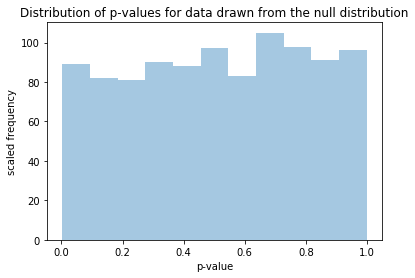

In [5]:
# Note: no TODOs here, just run the cell and understand the output.
# generate n draws from the normal distribution with mean mu_0 and variance sigma_0 = 1
mu_a = 0
sigma_a = 1
n = 1000

# define the random state to set the seed for consistency
# use rs like you would np.random
rs = np.random.RandomState(0)

# x_a is an n-dimensional vector with each draw equal to x_i defined in the cell above.
x_a = sigma_a * rs.randn(n) + mu_a

p_values = calculate_p_values(x_a, mean_0=mu_a, stdev_0 = sigma_a)

# plot the distribution of p-values for each draw
sns.distplot(p_values, kde=False)

plt.xlabel("p-value")
plt.ylabel("scaled frequency")
plt.title("Distribution of p-values for data drawn from the null distribution");

## 1b) Plot the distribution of p-values for 1000 random draws that actually come from the alternative distribution:
 $$ x_i \sim \mathcal{N}(2, 1) $$

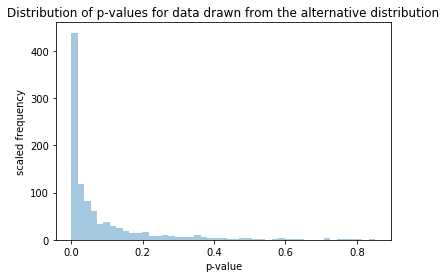

In [6]:
# Note: no TODOs here, just run the cell and understand the output.
# draw for a different distribution
mu_b = 2
sigma_b = 1
n = 1000
rs = np.random.RandomState(0)

# x_b in an n-dimensional vector 
x_b = sigma_b * rs.randn(n) + mu_b

p_values_b = calculate_p_values(x_b, mean_0=mu_a, stdev_0 = sigma_a)

# plot the distribution of p-values for each draw
sns.distplot(p_values_b, kde=False)
plt.xlabel("p-value")
plt.ylabel("scaled frequency")
plt.title("Distribution of p-values for data drawn from the alternative distribution");

## 1c) What do you notice?

TODO: fill in (<=2 sentences) of your observations. 

Note that in the decision-making setting, all we see is the combined distribution for draws from (0) and from (1), but not their designated labels.

In what follows we will look at different methods for trying to match instances from (1) to declared "discoveries" using the p-values. As the histogram of p-values above shows, there will in general be mistakes. We would like to specifically control the number of false discoveries reported.

# 2) Procedures to control false discovery

Now, we are going to imagine that we have a bunch of draws (each was either from the null distribution or the alternative distribution). We want to predict whether each draw was generated from $D_0$ or $D_1$ by looking at the p-value of each draw. Our goal is to control the probability of false discoveries in this decision-making process for multiple hypothesis testing.

We will implement three methods for making discoveries:
    1. Naive thresholding (ignoring that multiple testing is happening)
    2. Using Bonferroni correction to account for multiple testing
    3. The Benjamini-Hochberg procedure for multiple testing
    
    
For each method, we will assess the decisions made on a simulated data set. 

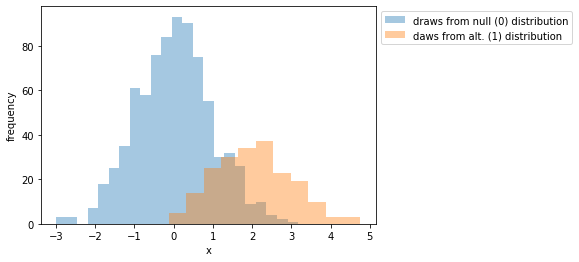

In [7]:
# NOTE: you just need to run this cell to instantiate variables; don't change this code.

rs = np.random.RandomState(0)
n = 1000

# roughly 80% of the data comes from the null distribution
# true_values is an n-dimensional array of indicators, where "1" means that x is from the alternative 
true_values = rs.binomial(1, 0.2, 1000)

# null distribution is N(0, 1) and alternative distribution is N(2, 1)
x_obs = rs.randn(n) + 2 * true_values

sns.distplot(x_obs[np.where(true_values == 0)],  label="draws from null (0) distribution", kde=False)
sns.distplot(x_obs[np.where(true_values == 1)],  label="daws from alt. (1) distribution", kde=False)

plt.xlabel("x")
plt.ylabel("frequency")
plt.legend(bbox_to_anchor=(1,1));

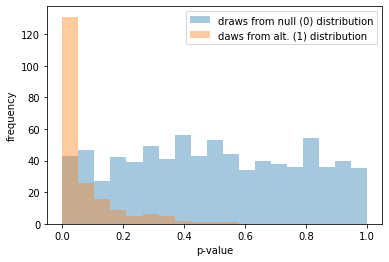

In [8]:
# NOTE: you just need to run this cell and understand what it does; no code to modify or write here. 
# set alpha 
alpha = 0.05

# calculate the p-values for each individual hypothesis
p_values = calculate_p_values(x_obs, mean_0=0, stdev_0=1)

bins = np.linspace(0,1,num=20)
sns.distplot(p_values[np.where(true_values == 0)],  label="draws from null (0) distribution", kde=False, bins=bins)
sns.distplot(p_values[np.where(true_values == 1)],  label="daws from alt. (1) distribution", kde=False,bins=bins)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("p-value")
plt.ylabel("frequency");

## 2a) Fill in the following functions regarding confusion matrices.

These functions will be important for reporting your results in a standardized way; later code assumes that you have implemented them so start here.

In [ ]:
def report_results(predicted_discoveries, truth):
    """
    Produces a dictionary with counts for the true positives, true negatives,
    false negatives, and false positives from the input `predicted_discoveries`
    and `truth` arrays.
    
    Args:
      predicted discoveries: n-dimensional array of 0/1 values where 1 indicates a "discovery".
      truth: n-dimensional array of 0/1 values where 1 indicates a draw from the alternative.
    
    Returns: a dictionary of TN, TP, FN, and FP counts.
    """   
    
    # populate the following dictionary with counts (NOT rates)
    # TODO: fill in each of these counts
    TP_count = # TODO: fill in
    TN_count = # TODO: fill in
    FP_count = # TODO: fill in
    FN_count = # TODO: fill in
    
    results_dictionary = {"TN_count": TN_count,
                          "TP_count": TP_count,
                          "FN_count": FN_count,
                          "FP_count": FP_count,
                         }
    
    # this function is defined for you below
    print_confusion_matrix(results_dictionary)
    return results_dictionary

def print_false_discovery_fraction(results_dictionary):
    total_predicted_discoveries = # TODO: fill in
    false_predicted_discoveries = # TODO: fill in
    
    # TODO: fill in - compute the false discovery fraction from the `results` dictionary
    false_discovery_frac = # TODO: fill in
    
    print("total discoveries: {0}".format(total_predicted_discoveries))
    print("fraction of discoveries which were actually false: {0:.3f}".format(false_discovery_frac))
    return total_predicted_discoveries, false_discovery_frac

def print_confusion_matrix(res_dict):
    # This is a helper function to print the confusion matrix. You don't need to modify this code.
    results_df = pd.DataFrame(data = {"Decision = 0": [res_dict['TN_count'], res_dict['FN_count']], 
                                      "Decision = 1":  [res_dict['FP_count'], res_dict['TP_count']]},
                             index=["Truth = 0", "Truth = 1"])
    print(results_df)


## 2b) Naive thresholding
Here we will investigate the result of using the threshold $\alpha = 0.05$ to test each hypothesis independently, ignoring that we are in a multiple testing scenario. 

Fill in the code for the function below to test each hypothesis at significance level $\alpha$.

In [ ]:
# TODO: calculate decisions based on thresholding
def naive_alpha_threshold(p_values, alpha):
    """
    Returns decisions on p-values using naive (uncorrected) thresholding.
    
    Inputs:
        p_values: array of p-values
        alpha: threshold (significance level)
    
    Returns:
        decisions: binary array of same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant at level `alpha`, and 0 otherwize
    """
    decisions = # TODO: fill in
    return decisions

In [ ]:
# Once you've filled in `naive_alpha_threshold`, run this cell to print the results. 
naive_decisions = naive_alpha_threshold(p_values, alpha)

results = report_results(naive_decisions,true_values)
print()
print_false_discovery_fraction(results)


## 2c) Bonferroni Correction
Here we will investigate the result of using Bonferroni-corrected p-values to declare discoveries.
First, implement the Bonfreroni procedure in the function below. 

Recall that for testing $n$ hypotheses with family-wise error rate (FWER) $\leq \alpha$, the resulting procedure is to test each hypothesis with significance $\frac{\alpha}{n}$.

In [ ]:
# TODO: calculate the decisions based on the bonferroni correction procedure.
def bonferroni(p_values, alpha_total):
    """
    Returns decisions on p-values using the Bonferroni correction.
    
    Inputs:
        p_values: array of p-values
        alpha_total: desired family-wise error rate (FWER = P(at least one false discovery))
    
    Returns:
        decisions: binary array of same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant, and 0 otherwise
    """
    decisions = # TODO: fill in
    
    return decisions

In [ ]:
# Once you've filled in `bonferroni`, run this cell to print the results. 
bonferroni_decisions = bonferroni(p_values, alpha)

results = report_results(bonferroni_decisions,true_values)
print()
print_false_discovery_fraction(results)


## 2d) Benjamini-Hochberg
Now we will investigate the result of implementing Benjamini-Hochberg procedure for multiple hypothesis testing.
First, implement the Benjamini-Hochberg procedure in the function below. 

Recall that for testing $n$ hypotheses with false discovery rate (FDR) $\leq \alpha$, the resulting procedure is to find the largest $k$ such that the $k^{th}$-largest of the $n$ p-values is less than or equal to $k \frac{\alpha}{n}$:
$$ P_{(k)} \leq k \frac{\alpha}{n}$$
We then declare a discovery for all p-values with value less than or equal to this $k^{th}$ p-value. 

In [ ]:
 def benjamini_hochberg(p_values, alpha):
    """
    Returns decisions on p-values using Benjamini-Hochberg.
    
    Inputs:
        p_values: array of p-values
        alpha: desired FDR (FDR = E[# false positives / # positives])
    
    Returns:
        decisions: binary array of same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant, and 0 otherwise
    """
    decisions = # TODO: fill in
    
    return decisions
    

Now, asses the result of applying the Benjamini Hochberg procedure to the simulated data.

In [ ]:
# Once you've filled in `benjamini_hochberg`, run this cell to print the results.
bh_decisions = benjamini_hochberg(p_values, alpha)

bh_results = report_results(bh_decisions,true_values)
print()

print_false_discovery_fraction(bh_results)


## 2e) Conclusions
Finally, write a short (<= 4 sentences) summary comparing the three different methods from this problem.

TODO: fill in your comparison.

## Final tests
If all the tests below pass you can assume you have successfuly completed the testable parts of the lab. Don't worry about understanding the code below; just make sure no asserts fail.

In [ ]:
import hashlib
import sys

def assert_discoveries(results,
                       true_vales,
                       true_positives_hash,
                       false_positives_hash,
                       true_negatives_hash,
                       false_negatives_hash,
                       false_discovery_frac_hash):
    def get_hash(num):
        return hashlib.md5(str(num).encode()).hexdigest()
    res_dict = report_results(results, true_values)
    
    
    assert(get_hash(res_dict['TP_count']) == true_positives_hash)
    assert(get_hash(res_dict['FP_count']) == false_positives_hash)
    assert(get_hash(res_dict['TN_count']) == true_negatives_hash)
    assert(get_hash(res_dict['FN_count']) == false_negatives_hash)
    _, false_discovery_frac = print_false_discovery_fraction(res_dict)
    print(false_discovery_frac)
    print(get_hash(false_discovery_frac))
    assert(get_hash(false_discovery_frac) == false_discovery_frac_hash)
    print()
    

assert_discoveries(naive_decisions,
                   true_values,
                   true_positives_hash="9b8619251a19057cff70779273e95aa6",
                   false_positives_hash="a1d0c6e83f027327d8461063f4ac58a6",
                   true_negatives_hash="ccb0989662211f61edae2e26d58ea92f",
                    false_negatives_hash="d2ddea18f00665ce8623e36bd4e3c7c5",
                   false_discovery_frac_hash="925c6c13fdd65415e416ddf203c36673")
assert_discoveries(bonferroni_decisions,
                   true_values,
                   true_positives_hash="1679091c5a880faf6fb5e6087eb1b2dc",
                   false_positives_hash="cfcd208495d565ef66e7dff9f98764da",
                   true_negatives_hash="beb22fb694d513edcf5533cf006dfeae",
                   false_negatives_hash="85d8ce590ad8981ca2c8286f79f59954",
                   false_discovery_frac_hash="30565a8911a6bb487e3745c0ea3c8224")
assert_discoveries(bh_decisions,
                   true_values,
                   true_positives_hash="f457c545a9ded88f18ecee47145a72c0",
                   false_positives_hash="c4ca4238a0b923820dcc509a6f75849b",
                   true_negatives_hash="35cf8659cfcb13224cbd47863a34fc58",
                   false_negatives_hash="1d7f7abc18fcb43975065399b0d1e48e",
                   false_discovery_frac_hash="0d16a6cb2ca34d65da949608a7bc01d1")
    
print("All tests passed! You are awesome!")